In [19]:
from __future__ import print_function, division

# Necessary imports
# all of the imports
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline
#figure % new figure window

import warnings
warnings.filterwarnings('ignore')

In [20]:
#Load Data
df = pd.read_csv('sea_listings.csv')

In [21]:
#df.columns

In [22]:
listingdf = df

In [23]:
listingdf = listingdf.drop('listing_url', axis = 1)
listingdf = listingdf.drop('scrape_id', axis = 1)
listingdf = listingdf.drop('last_scraped', axis = 1)
listingdf = listingdf.drop('name', axis = 1)
listingdf = listingdf.drop('summary', axis = 1)
listingdf = listingdf.drop('space', axis = 1)
listingdf = listingdf.drop('description', axis = 1)
listingdf = listingdf.drop('experiences_offered', axis = 1)
listingdf = listingdf.drop('neighborhood_overview', axis = 1)
listingdf = listingdf.drop('notes', axis = 1)
listingdf = listingdf.drop('transit', axis = 1)
listingdf = listingdf.drop('thumbnail_url', axis = 1)
listingdf = listingdf.drop('medium_url', axis = 1)
listingdf = listingdf.drop('picture_url', axis = 1)
listingdf = listingdf.drop('xl_picture_url', axis = 1)
listingdf = listingdf.drop('host_id', axis = 1)
listingdf = listingdf.drop('host_url', axis = 1)
listingdf = listingdf.drop('host_name', axis = 1)
listingdf = listingdf.drop('host_since', axis = 1)
listingdf = listingdf.drop('host_location', axis = 1)
listingdf = listingdf.drop('host_about', axis = 1)
#listingdf = listingdf.drop('host_response_time, axis = 1) #maybe
listingdf = listingdf.drop('host_thumbnail_url', axis = 1)
listingdf = listingdf.drop('street', axis = 1)
listingdf = listingdf.drop('host_picture_url', axis = 1)
listingdf = listingdf.drop('host_neighbourhood', axis = 1)
listingdf = listingdf.drop('host_listings_count', axis = 1)
listingdf = listingdf.drop('host_total_listings_count', axis = 1)
listingdf = listingdf.drop('host_verifications', axis = 1)
listingdf = listingdf.drop('host_has_profile_pic', axis = 1)
listingdf = listingdf.drop('host_identity_verified', axis = 1)
listingdf = listingdf.drop('neighbourhood', axis = 1)
listingdf = listingdf.drop('neighbourhood_group_cleansed', axis = 1)
listingdf = listingdf.drop('city', axis = 1)
listingdf = listingdf.drop('state', axis = 1)
listingdf = listingdf.drop('market', axis = 1)
listingdf = listingdf.drop('country', axis = 1)
listingdf = listingdf.drop('latitude', axis = 1)
listingdf = listingdf.drop('longitude', axis = 1)
listingdf = listingdf.drop('is_location_exact', axis = 1)
listingdf = listingdf.drop('square_feet', axis = 1)
listingdf = listingdf.drop('weekly_price', axis = 1)
listingdf = listingdf.drop('monthly_price', axis = 1)
listingdf = listingdf.drop('security_deposit', axis = 1)
listingdf = listingdf.drop('calendar_updated', axis = 1)
listingdf = listingdf.drop('has_availability', axis = 1)
listingdf = listingdf.drop('availability_30', axis = 1)
listingdf = listingdf.drop('availability_60', axis = 1)
listingdf = listingdf.drop('availability_90', axis = 1)
listingdf = listingdf.drop('availability_365', axis = 1)
listingdf = listingdf.drop('calendar_last_scraped', axis = 1)
listingdf = listingdf.drop('first_review', axis = 1)
listingdf = listingdf.drop('last_review', axis = 1)
listingdf = listingdf.drop('requires_license', axis = 1)
listingdf = listingdf.drop('license', axis = 1)
listingdf = listingdf.drop('jurisdiction_names', axis = 1)
listingdf = listingdf.drop('require_guest_profile_picture', axis = 1)
listingdf = listingdf.drop('require_guest_phone_verification', axis = 1)
listingdf = listingdf.drop('calculated_host_listings_count', axis = 1)
listingdf = listingdf.drop('reviews_per_month', axis = 1)
listingdf = listingdf.drop('smart_location', axis = 1) # maybe
listingdf = listingdf.drop('zipcode', axis = 1) # maybe
listingdf = listingdf.drop('country_code', axis = 1) # maybe
listingdf = listingdf.drop('amenities', axis = 1) # to be added later

listingdf = listingdf.drop('extra_people', axis = 1) # to be added later
listingdf = listingdf.drop('id', axis = 1) 

In [24]:
listingdf.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,within a few hours,96%,100%,f,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate
1,within an hour,98%,100%,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict
2,within a few hours,67%,100%,f,West Queen Anne,House,Entire home/apt,11,4.5,5.0,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict
3,NaN,NaN,NaN,f,West Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
4,within an hour,100%,NaN,f,West Queen Anne,House,Entire home/apt,6,2.0,3.0,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict


In [25]:
listingdf = listingdf.dropna()

In [26]:
listingdf['host_response_rate'] = listingdf['host_response_rate'].str.replace('%','')
listingdf['host_response_rate'] = listingdf['host_response_rate'].astype('float')

listingdf['host_acceptance_rate'] = listingdf['host_acceptance_rate'].str.replace('%','')
listingdf['host_acceptance_rate'] = listingdf['host_acceptance_rate'].astype('float')

listingdf['price'] = listingdf['price'].str.replace('$','')
listingdf['price'] = listingdf['price'].astype('float')

listingdf['cleaning_fee'] = listingdf['cleaning_fee'].str.replace('$','')
listingdf['cleaning_fee'] = listingdf['cleaning_fee'].astype('float')


In [27]:
pd.get_dummies(listingdf, columns=['instant_bookable', 'bed_type', 'room_type','property_type', 'neighbourhood_cleansed','host_is_superhost', 'neighbourhood_cleansed', 'host_response_time', 'cancellation_policy'])


,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,minimum_nights,...,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
1,98.0,100.0,4,1.0,1.0,1.0,150.0,40.0,1,2,...,0,0,0,0,0,0,1,0,0,1
2,67.0,100.0,11,4.5,5.0,7.0,975.0,300.0,10,4,...,0,0,0,0,0,1,0,0,0,1
7,100.0,100.0,2,1.0,1.0,1.0,60.0,25.0,1,2,...,0,0,0,0,0,0,1,0,0,1
9,98.0,100.0,4,1.0,1.0,1.0,150.0,40.0,1,2,...,0,0,0,0,0,0,1,0,0,1
10,100.0,100.0,2,1.0,1.0,1.0,95.0,15.0,2,3,...,0,0,0,0,0,1,0,0,1,0
11,100.0,100.0,2,1.0,1.0,1.0,99.0,150.0,1,3,...,0,0,0,0,0,1,0,0,0,1
12,100.0,100.0,4,1.0,2.0,3.0,245.0,95.0,1,3,...,0,0,0,0,0,0,1,0,1,0
13,100.0,100.0,5,1.0,2.0,3.0,165.0,85.0,4,2,...,0,0,0,0,0,0,1,0,0,1
14,100.0,100.0,16,3.5,6.0,15.0,461.0,300.0,8,3,...,0,0,0,0,0,0,1,0,0,1
15,100.0,100.0,5,1.0,2.0,2.0,109.0,89.0,1,3,...,0,0,0,0,0,1,0,0,0,1


In [28]:
listingdf = listingdf.reset_index(drop=True)


In [29]:
# View the correlations

listingdf.corr()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
host_response_rate,1.000000,-0.009560,0.007824,0.003128,-0.002636,0.007934,-0.028064,-0.057630,0.060826,0.006647,-0.093712,0.110252,0.141699,0.112988,0.136831,0.137698,0.146717,0.060773,0.114653
host_acceptance_rate,-0.009560,1.000000,0.017525,0.010376,0.008363,0.015648,0.008931,0.018437,0.013200,-0.000447,-0.017245,0.012579,-0.018580,0.019327,-0.012132,-0.007853,-0.007763,-0.013395,0.013024
accommodates,0.007824,0.017525,1.000000,0.588158,0.776129,0.863926,0.662136,0.672942,0.538664,0.008487,0.025940,-0.103328,-0.022777,-0.054372,-0.010025,-0.031386,-0.020953,-0.050160,-0.066226
bathrooms,0.003128,0.010376,0.588158,1.000000,0.665838,0.566883,0.589560,0.540392,0.335815,-0.002668,-0.000066,-0.118102,0.047569,-0.020684,0.010127,-0.003620,-0.019769,-0.004441,0.001995
bedrooms,-0.002636,0.008363,0.776129,0.665838,1.000000,0.754958,0.643387,0.627687,0.474650,0.000928,0.005307,-0.114265,0.010795,-0.017587,-0.037335,-0.002383,-0.007318,-0.028360,-0.014428
beds,0.007934,0.015648,0.863926,0.566883,0.754958,1.000000,0.609165,0.642882,0.467802,-0.010407,0.019655,-0.114299,-0.006523,-0.055270,-0.007315,-0.024175,-0.013707,-0.030808,-0.034419
price,-0.028064,0.008931,0.662136,0.589560,0.643387,0.609165,1.000000,0.672466,0.426220,0.016511,0.000067,-0.127473,0.068983,0.013575,0.054973,0.005873,0.008007,0.092367,-0.039188
cleaning_fee,-0.057630,0.018437,0.672942,0.540392,0.627687,0.642882,0.672466,1.000000,0.344320,0.019094,0.029633,-0.188335,-0.013965,-0.039740,0.041349,-0.081175,-0.062849,-0.002792,-0.087771
guests_included,0.060826,0.013200,0.538664,0.335815,0.474650,0.467802,0.426220,0.344320,1.000000,-0.008992,-0.051294,0.021450,0.001140,0.014462,0.008236,0.043556,0.024420,-0.029010,-0.007775
minimum_nights,0.006647,-0.000447,0.008487,-0.002668,0.000928,-0.010407,0.016511,0.019094,-0.008992,1.000000,0.014069,-0.015689,-0.002040,-0.018812,-0.049392,-0.027286,0.008514,0.016650,-0.011771


In [30]:
# Plot all of the variable-to-variable relations as scatterplots

#sns.pairplot(listingdf)



In [31]:
listingdf.columns
list = []
for col in listingdf.columns:
    list.append(col)
    
list = " + ".join(list)
#print(list)

In [32]:
# # Create your feature matrix (X) and target vector (y)
# y, X = patsy.dmatrices('price ~ host_response_rate + host_acceptance_rate + accommodates + bathrooms + bedrooms + beds + cleaning_fee + guests_included + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable_f + instant_bookable_t + bed_type_Airbed + bed_type_Couch + bed_type_Futon + bed_type_Pull-out Sofa + bed_type_Real Bed + room_type_Entire home/apt + room_type_Private room + room_type_Shared room + property_type_Apartment + property_type_Bed & Breakfast + property_type_Boat + property_type_Bungalow + property_type_Cabin + property_type_Camper/RV + property_type_Chalet + property_type_Condominium + property_type_Dorm + property_type_House + property_type_Loft + property_type_Other + property_type_Townhouse + property_type_Yurt + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_Arbor Heights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_Bitter Lake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_Cedar Park + neighbourhood_cleansed_Central Business District + neighbourhood_cleansed_Columbia City + neighbourhood_cleansed_Crown Hill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_East Queen Anne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_Fairmount Park + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_First Hill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_Green Lake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_Haller Lake + neighbourhood_cleansed_Harrison/Denny-Blaine + neighbourhood_cleansed_High Point + neighbourhood_cleansed_Highland Park + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_International District + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_Lawton Park + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_Lower Queen Anne + neighbourhood_cleansed_Loyal Heights + neighbourhood_cleansed_Madison Park + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_Maple Leaf + neighbourhood_cleansed_Matthews Beach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid-Beacon Hill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_Mount Baker + neighbourhood_cleansed_North Admiral + neighbourhood_cleansed_North Beach/Blue Ridge + neighbourhood_cleansed_North Beacon Hill + neighbourhood_cleansed_North College Park + neighbourhood_cleansed_North Delridge + neighbourhood_cleansed_North Queen Anne + neighbourhood_cleansed_Olympic Hills + neighbourhood_cleansed_Phinney Ridge + neighbourhood_cleansed_Pike-Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_Pioneer Square + neighbourhood_cleansed_Portage Bay + neighbourhood_cleansed_Rainier Beach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_Seward Park + neighbourhood_cleansed_South Beacon Hill + neighbourhood_cleansed_South Delridge + neighbourhood_cleansed_South Lake Union + neighbourhood_cleansed_South Park + neighbourhood_cleansed_Southeast Magnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_Sunset Hill + neighbourhood_cleansed_University District + neighbourhood_cleansed_Victory Heights + neighbourhood_cleansed_View Ridge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_West Queen Anne + neighbourhood_cleansed_West Woodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_Whittier Heights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_Yesler Terrace + host_is_superhost_f + host_is_superhost_t + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_Arbor Heights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_Bitter Lake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_Cedar Park + neighbourhood_cleansed_Central Business District + neighbourhood_cleansed_Columbia City + neighbourhood_cleansed_Crown Hill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_East Queen Anne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_Fairmount Park + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_First Hill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_Green Lake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_Haller Lake + neighbourhood_cleansed_Harrison/Denny-Blaine + neighbourhood_cleansed_High Point + neighbourhood_cleansed_Highland Park + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_International District + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_Lawton Park + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_Lower Queen Anne + neighbourhood_cleansed_Loyal Heights + neighbourhood_cleansed_Madison Park + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_Maple Leaf + neighbourhood_cleansed_Matthews Beach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid-Beacon Hill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_Mount Baker + neighbourhood_cleansed_North Admiral + neighbourhood_cleansed_North Beach/Blue Ridge + neighbourhood_cleansed_North Beacon Hill + neighbourhood_cleansed_North College Park + neighbourhood_cleansed_North Delridge + neighbourhood_cleansed_North Queen Anne + neighbourhood_cleansed_Olympic Hills + neighbourhood_cleansed_Phinney Ridge + neighbourhood_cleansed_Pike-Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_Pioneer Square + neighbourhood_cleansed_Portage Bay + neighbourhood_cleansed_Rainier Beach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_Seward Park + neighbourhood_cleansed_South Beacon Hill + neighbourhood_cleansed_South Delridge + neighbourhood_cleansed_South Lake Union + neighbourhood_cleansed_South Park + neighbourhood_cleansed_Southeast Magnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_Sunset Hill + neighbourhood_cleansed_University District + neighbourhood_cleansed_Victory Heights + neighbourhood_cleansed_View Ridge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_West Queen Anne + neighbourhood_cleansed_West Woodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_Whittier Heights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_Yesler Terrace + host_response_time_a few days or more + host_response_time_within a day + host_response_time_within a few hours + host_response_time_within an hour + cancellation_policy_flexible + cancellation_policy_moderate + cancellation_policy_strict'
# , data=listingdf, return_type="dataframe")

# # Create your model
# model = sm.OLS(y,X)
# # Fit your model to your training set
# fit = model.fit()
# # Print summary statistics of the model's performance
# fit.summary()

In [33]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('price ~ host_response_time + host_response_rate + host_acceptance_rate + host_is_superhost + neighbourhood_cleansed + property_type + room_type + accommodates + bathrooms + bedrooms + beds + bed_type + cleaning_fee + guests_included + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable + cancellation_policy', data=listingdf, return_type="dataframe")

# Create your model
model = sm.OLS(y,X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     32.18
Date:                Fri, 20 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:07:52   Log-Likelihood:                -10851.
No. Observations:                2042   AIC:                         2.196e+04
Df Residuals:                    1914   BIC:                         2.268e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                              29.8438     65.362      0.457      0.648     -98.345     158.033
host_response_time[T.within a day]                    -15.4695     16.223     -0.954      0.340     -47.285      16.346
host_response_time[T.within a few hours]               -6.6445     16.846     -0.394      0.693     -39.683      26.394
host_response_time[T.within an hour]                  -18.6994     17.030     -1.098      0.272     -52.098      14.699
host_is_superhost[T.t]                                 15.2442      2.811      5.424      0.000       9.732      20.756
neighbourhood_cleansed[T.Alki]                          9.2577     14.684      0.630      0.528     -19.541      38.057
neighbourhood_cleansed[T.Arbor Heights]               -13.4890     37.126     -0.363      0.716     -86.301      59.324
neighbourhood_cleansed[T.Atlantic]                     -6.1452     13.199     -0.466      0.642     -32.031      19.740
neighbourhood_cleansed[T.Belltown]                     28.0325      9.546      2.937      0.003       9.311      46.754
neighbourhood_cleansed[T.Bitter Lake]                 -51.4629     21.074     -2.442      0.015     -92.793     -10.133
neighbourhood_cleansed[T.Briarcliff]                   -2.9766     19.323     -0.154      0.878     -40.872      34.919
neighbourhood_cleansed[T.Brighton]                    -22.1138     18.612     -1.188      0.235     -58.616      14.388
neighbourhood_cleansed[T.Broadview]                   -51.1036     30.600     -1.670      0.095    -111.116       8.909
neighbourhood_cleansed[T.Broadway]                     15.8356      9.148      1.731      0.084      -2.105      33.777
neighbourhood_cleansed[T.Bryant]                      -19.8942     16.056     -1.239      0.215     -51.383      11.595
neighbourhood_cleansed[T.Cedar Park]                   12.3624     37.061      0.334      0.739     -60.321      85.046
neighbourhood_cleansed[T.Central Business District]    31.0807     10.465      2.970      0.003      10.557      51.604
neighbourhood_cleansed[T.Columbia City]               -22.2454     12.062     -1.844      0.065     -45.902       1.411
neighbourhood_cleansed[T.Crown Hill]                  -30.8375     16.947     -1.820      0.069     -64.074       2.399
neighbourhood_cleansed[T.Dunlap]                      -21.7222     18.530     -1.172      0.241     -58.063      14.619
neighbourhood_cleansed[T.East Queen Anne]              34.9730     11.256      3.107      0.002      12.898      57.048
neighbourhood_cleansed[T.Eastlake]                      1.4313     14.223      0.101      0.920     -26.464      29.326
neighbourhood_cleansed[T.Fairmount Park]              -22.8617     15.298     -1.49

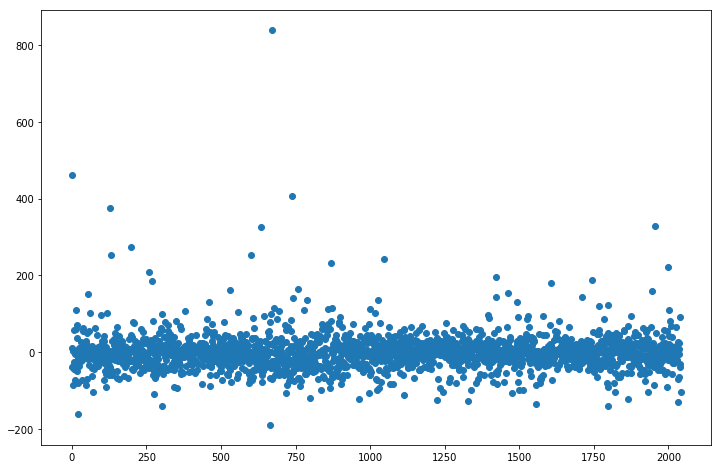

In [34]:
fit.resid.plot(style='o', figsize=(12,8));

In [35]:
# p = model.fit().params
# x = np.arange(1, 3)
# ax = df.plot(x='host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy'
#             , y='price', kind='scatter')


# # X = np.array(['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy'])
# # y = np.array(['price'])

# # sns.regplot(x = X , y = y , data=listingdf)

In [36]:
#X = listingdf['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy']


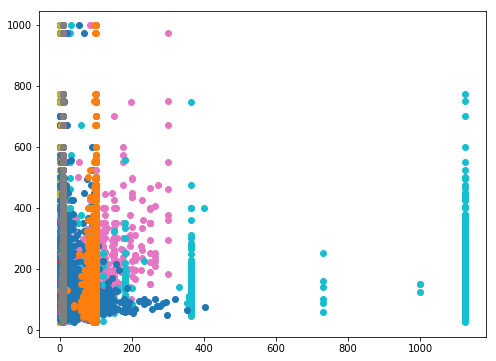

In [37]:


fig, ax = plt.subplots(figsize=(8,6))


ax.plot(X, y, 'o', label="Data")
#ax.plot(X, y, 'b-', label="True")
#ax.plot(X, fit.fittedvalues, 'r--.', label="Predicted")
# ax.plot(X, iv_u, 'r--')
# ax.plot(X, iv_l, 'r--')
#legend = ax.legend(loc="best")

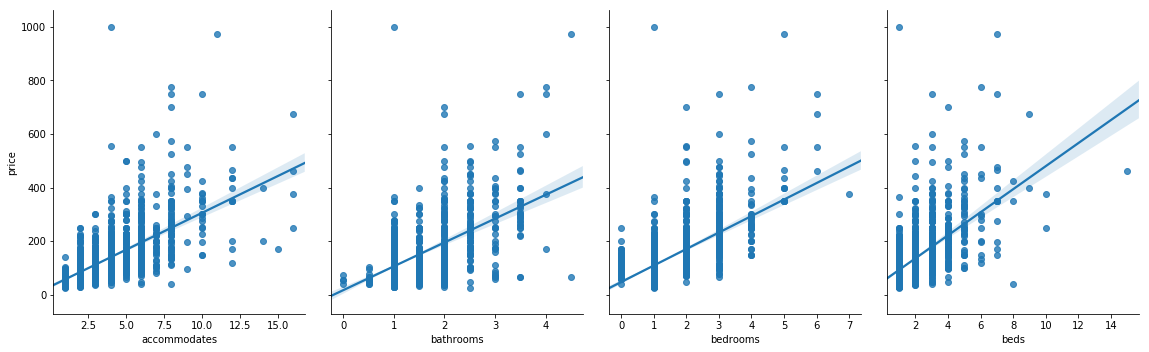

In [38]:
#Relationship between "accommodates", "bathrooms", "bedrooms", "beds" vs "price"

sns.pairplot(listingdf, x_vars=["accommodates", "bathrooms", "bedrooms", "beds"], y_vars=["price"],
             size=5, aspect=.8, kind="reg");


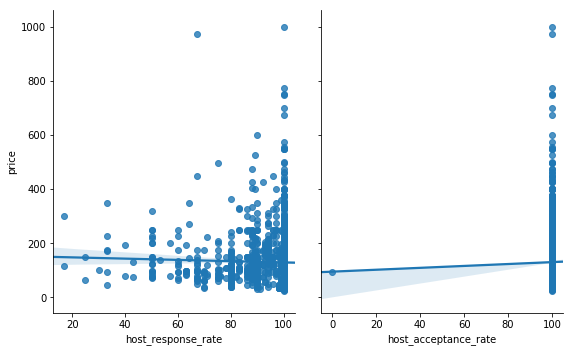

In [39]:
#Relationship between "host_response_rate","host_acceptance_rate" vs "price"

sns.pairplot(listingdf, x_vars=["host_response_rate","host_acceptance_rate"], y_vars=["price"],
             size=5, aspect=.8, kind="reg");

AttributeError: 'str' object has no attribute 'conjugate'

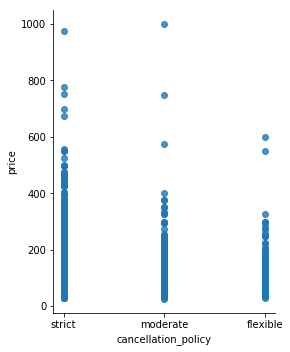

In [40]:
#Relationship between "host_response_rate","host_acceptance_rate" vs "price"

sns.pairplot(listingdf, x_vars=["cancellation_policy"], y_vars=["price"],
             size=5, aspect=.8, kind="reg");

In [ ]:
# $range between "property_type" -> may need to analysis diff property type separately?


sns.pairplot(listingdf, x_vars=["property_type"], y_vars=["price"],
             size=15, aspect=0.8, kind="reg");

In [ ]:
sns.countplot(x="property_type", data=listingdf, palette="Greens_d");


In [ ]:

lm1 = smf.ols('price ~ host_response_time + host_response_rate + host_acceptance_rate + host_is_superhost + neighbourhood_cleansed + property_type + room_type + accommodates + bathrooms + bedrooms + beds + bed_type + cleaning_fee + guests_included + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable + cancellation_policy', data=listingdf)

fit2 = lm1.fit()
fit2.summary()

In [ ]:
fig, ax = plt.subplots(figsize=(12))
fig = sm.graphics.plot_partregress('price', 'accommodates' , ['accommodates','proprty_type'], data=fit, ax=ax)
